In [2]:
"""
1. Write a Python program to perform a Z-test for comparing a sample mean to a known population mean and interpret the results.
"""
import numpy as np
from statsmodels.stats.weightstats import ztest

sample_data = np.array([50,52,46,53,49,47,52,53,51,48])

pop_mean = 50

z_stat, p_value = ztest(sample_data, value=pop_mean)

print(f"Z-statistic: {z_stat:.3f}")
print(f"P-value: {p_value:.3f}")

alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis: The sample mean is significantly different from the population mean.")
else:
    print("Fail to reject the null hypothesis: No significant difference between the sample and population mean.")

Z-statistic: 0.126
P-value: 0.900
Fail to reject the null hypothesis: No significant difference between the sample and population mean.


In [3]:
"""
2. Simulate random data to perform hypothesis testing and calculate the corresponding P-value using Python.
"""
import numpy as np
from scipy import stats


np.random.seed(42)
sample = np.random.normal(loc=100, scale=15, size=30)


t_stat, p_value = stats.ttest_1samp(sample, popmean=100)

print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.3f}")


T-statistic: -1.145
P-value: 0.262


In [4]:
"""
3.Implement a one-sample Z-test using Python to compare the sample mean with the population mean.
"""
import numpy as np
from statsmodels.stats.weightstats import ztest

# Simulate data
np.random.seed(42)
sample = np.random.normal(50, 5, 40)
pop_mean = 50

# Perform one-sample Z-test
z_stat, p_value = ztest(sample, value=pop_mean)

print(f"Z-statistic: {z_stat:.3f}")
print(f"P-value: {p_value:.3f}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

Z-statistic: -1.451
P-value: 0.147
Fail to reject the null hypothesis.


Z-statistic: -1.145
P-value: 0.252


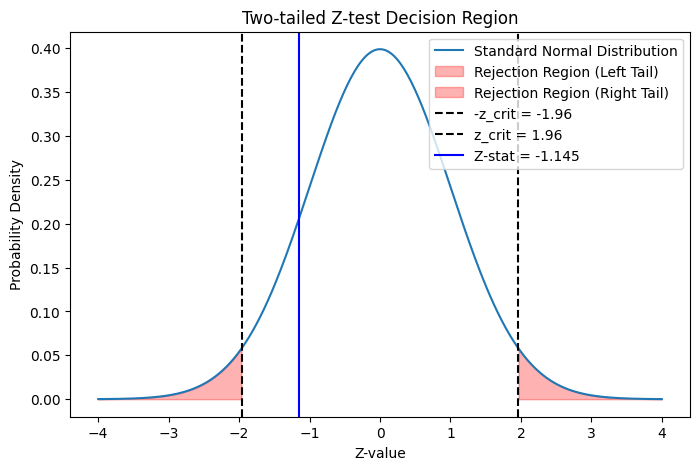

In [7]:
"""
4. Perform a two-tailed Z-test using Python and visualize the decision region on a plot.
"""

import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.weightstats import ztest
from scipy.stats import norm

# Generate sample data
np.random.seed(42)
sample = np.random.normal(50, 5, 30)

# Perform Z-test
z_stat, p_value = ztest(sample, value=50)
print(f"Z-statistic: {z_stat:.3f}")
print(f"P-value: {p_value:.3f}")

# Visualizing the decision region
x = np.linspace(-4, 4, 300)
y = norm.pdf(x, 0, 1)  # standard normal PDF

# Critical values for a two-tailed test at alpha=0.05
z_crit = 1.96

plt.figure(figsize=(8, 5))
plt.plot(x, y, label="Standard Normal Distribution")

# Shade regions beyond ±z_crit
plt.fill_between(x, y, where=(x <= -z_crit), color='red', alpha=0.3, label="Rejection Region (Left Tail)")
plt.fill_between(x, y, where=(x >= z_crit), color='red', alpha=0.3, label="Rejection Region (Right Tail)")

# Vertical lines for critical values and test statistic
plt.axvline(x=-z_crit, color='black', linestyle='--', label=f"-z_crit = -{z_crit}")
plt.axvline(x=z_crit, color='black', linestyle='--', label=f"z_crit = {z_crit}")
plt.axvline(x=z_stat, color='blue', linestyle='-', label=f"Z-stat = {z_stat:.3f}")

plt.title("Two-tailed Z-test Decision Region")
plt.xlabel("Z-value")
plt.ylabel("Probability Density")
plt.legend()
plt.show()

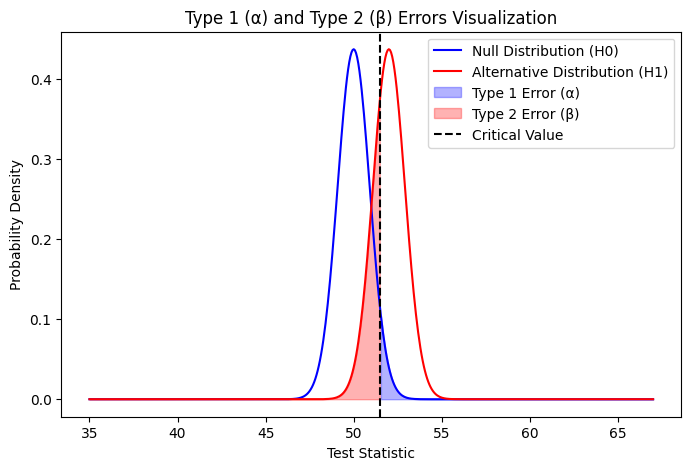

In [8]:
"""
5. Create a Python function that calculates and visualizes Type 1 and Type 2 errors during hypothesis testing.
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def plot_errors(alpha=0.05, mu0=50, mu1=52, sigma=5, n=30):
    """
    Plots Type 1 (alpha) and Type 2 (beta) errors for a one-sided test.
    
    :param alpha: Significance level (Type 1 error rate)
    :param mu0: Mean under the null hypothesis
    :param mu1: Mean under the alternative hypothesis
    :param sigma: Population standard deviation
    :param n: Sample size
    """
    # Standard error
    se = sigma / np.sqrt(n)
    
    # Critical value (one-sided test example)
    critical_value = mu0 + norm.ppf(1 - alpha) * se
    
    # X range for plotting
    x = np.linspace(mu0 - 3*sigma, mu1 + 3*sigma, 500)
    
    # PDFs for null and alternative
    y_null = norm.pdf(x, mu0, se)
    y_alt = norm.pdf(x, mu1, se)
    
    plt.figure(figsize=(8, 5))
    plt.plot(x, y_null, label="Null Distribution (H0)", color="blue")
    plt.plot(x, y_alt, label="Alternative Distribution (H1)", color="red")
    
    # Type 1 error region: x > critical_value under the null distribution
    plt.fill_between(x, y_null, where=(x >= critical_value), color="blue", alpha=0.3, label="Type 1 Error (α)")

    # Type 2 error region: x < critical_value under the alternative distribution
    plt.fill_between(x, y_alt, where=(x <= critical_value), color="red", alpha=0.3, label="Type 2 Error (β)")
    
    # Mark critical value
    plt.axvline(critical_value, color="black", linestyle="--", label="Critical Value")
    
    plt.legend()
    plt.title("Type 1 (α) and Type 2 (β) Errors Visualization")
    plt.xlabel("Test Statistic")
    plt.ylabel("Probability Density")
    plt.show()

# Example usage
plot_errors()

In [9]:
"""
6. Write a Python program to perform an independent T-test and interpret the results.
"""

import numpy as np
from scipy import stats

# Simulate two independent samples
np.random.seed(42)
group1 = np.random.normal(100, 10, 30)  # mean=100, std=10
group2 = np.random.normal(105, 10, 30)  # mean=105, std=10

# Perform independent two-sample t-test
t_stat, p_value = stats.ttest_ind(group1, group2)

print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.3f}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The two groups have significantly different means.")
else:
    print("Fail to reject the null hypothesis: No significant difference between the groups.")

T-statistic: -2.398
P-value: 0.020
Reject the null hypothesis: The two groups have significantly different means.


T-statistic: -1.640
P-value: 0.112


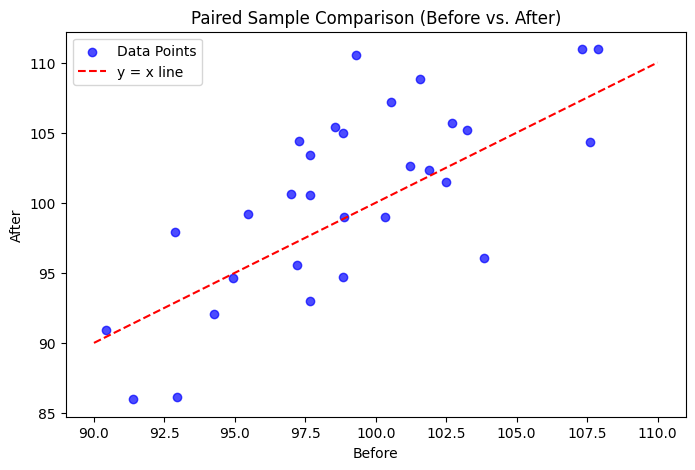

In [10]:
"""
7. Perform a paired sample T-test using Python and visualize the comparison results.
"""

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Simulate paired data
np.random.seed(42)
before = np.random.normal(100, 5, 30)
after = before + np.random.normal(2, 5, 30)  # 'after' is 'before' plus some difference

# Perform paired t-test
t_stat, p_value = stats.ttest_rel(before, after)

print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.3f}")

# Visualization
plt.figure(figsize=(8, 5))
plt.scatter(before, after, c='blue', alpha=0.7, label="Data Points")
plt.plot([90, 110], [90, 110], 'r--', label="y = x line")  # reference line

plt.xlabel("Before")
plt.ylabel("After")
plt.title("Paired Sample Comparison (Before vs. After)")
plt.legend()
plt.show()


In [11]:
"""
8. Simulate data and perform both Z-test and T-test, then compare the results using Python.
"""
import numpy as np
from statsmodels.stats.weightstats import ztest
from scipy.stats import ttest_1samp

# Generate random data
np.random.seed(42)
sample = np.random.normal(100, 15, 30)

# Z-test (requires known or assumed population std or large sample approximation)
z_stat, p_value_z = ztest(sample, value=100)

# T-test
t_stat, p_value_t = ttest_1samp(sample, 100)

print(f"Z-test: Z-statistic = {z_stat:.3f}, P-value = {p_value_z:.3f}")
print(f"T-test: T-statistic = {t_stat:.3f}, P-value = {p_value_t:.3f}")

# Interpretation
alpha = 0.05
if p_value_z < alpha:
    print("Z-test: Reject the null hypothesis.")
else:
    print("Z-test: Fail to reject the null hypothesis.")

if p_value_t < alpha:
    print("T-test: Reject the null hypothesis.")
else:
    print("T-test: Fail to reject the null hypothesis.")


Z-test: Z-statistic = -1.145, P-value = 0.252
T-test: T-statistic = -1.145, P-value = 0.262
Z-test: Fail to reject the null hypothesis.
T-test: Fail to reject the null hypothesis.


In [12]:
"""
9. Write a Python function to calculate the confidence interval for a sample mean and explain its significance.
"""

import numpy as np
from scipy import stats

def confidence_interval(sample, confidence=0.95):
    
    sample = np.array(sample, dtype=float)
    
    n = len(sample)
    mean = np.mean(sample)
    std_err = stats.sem(sample)  # or np.std(sample, ddof=1)/np.sqrt(n)
    
    # Determine the t-critical value
    alpha = 1 - confidence
    t_crit = stats.t.ppf(1 - alpha/2, df=n-1)
    
    # Calculate margin of error
    margin_of_error = t_crit * std_err
    
    # Compute lower and upper confidence interval bounds
    lower_bound = mean - margin_of_error
    upper_bound = mean + margin_of_error
    
    return lower_bound, upper_bound

# Example usage:
if __name__ == "__main__":
    # Simulate some data
    np.random.seed(42)
    data = np.random.normal(loc=50, scale=5, size=30)
    
    ci_lower, ci_upper = confidence_interval(data, confidence=0.95)
    print(f"Sample mean: {np.mean(data):.2f}")
    print(f"95% Confidence Interval: [{ci_lower:.2f}, {ci_upper:.2f}]")


Sample mean: 49.06
95% Confidence Interval: [47.38, 50.74]


In [13]:
"""
10. Write a Python program to calculate the margin of error for a given confidence level using sample data.
"""

import scipy.stats as stats
import numpy as np

def margin_of_error(confidence_level, data):
    sample_mean = np.mean(data)
    sample_std = np.std(data, ddof=1)
    n = len(data)
    z_score = stats.norm.ppf(1 - (1 - confidence_level) / 2)
    moe = z_score * (sample_std / np.sqrt(n))
    return moe

# Example usage
sample_data = [12, 14, 15, 16, 13, 17, 18, 12, 14, 16]
confidence_level = 0.95
print("Margin of Error:", margin_of_error(confidence_level, sample_data))


Margin of Error: 1.2752323582105263


In [14]:
"""
11. Implement a Bayesian inference method using Bayes' Theorem in Python and explain the process.
"""

def bayes_theorem(prior, likelihood, evidence):
    posterior = (likelihood * prior) / evidence
    return posterior

# Example
prior = 0.01  # Prior probability of having a disease
likelihood = 0.9  # Probability of testing positive given the disease
false_positive_rate = 0.05  # Probability of testing positive without the disease
evidence = (likelihood * prior) + (false_positive_rate * (1 - prior))

posterior = bayes_theorem(prior, likelihood, evidence)
print("Posterior Probability:", posterior)


Posterior Probability: 0.15384615384615385


In [ ]:
"""
12. Perform a Chi-square test for independence between two categorical variables in Python.
"""

import scipy.stats as stats
import numpy as np

# Example contingency table
data = np.array([[20, 30], [10, 40]])
chi2, p, dof, expected = stats.chi2_contingency(data)

print("Chi-Square Statistic:", chi2)
print("P-value:", p)


Chi-Square Statistic: 3.8571428571428577
P-value: 0.04953461343562649


In [16]:
"""
13. Write a Python program to calculate the expected frequencies for a Chi-square test based on observed data.
"""

import scipy.stats as stats

observed = np.array([[20, 30], [10, 40]])
_, _, _, expected = stats.chi2_contingency(observed)

print("Expected Frequencies:\n", expected)


Expected Frequencies:
 [[15. 35.]
 [15. 35.]]


In [17]:
"""
14. Perform a goodness-of-fit test using Python to compare the observed data to an expected distribution.
"""

observed = np.array([50, 30, 20])
expected = np.array([40, 40, 20])
chi2, p = stats.chisquare(observed, expected)

print("Chi-Square Statistic:", chi2)
print("P-value:", p)


Chi-Square Statistic: 5.0
P-value: 0.0820849986238988


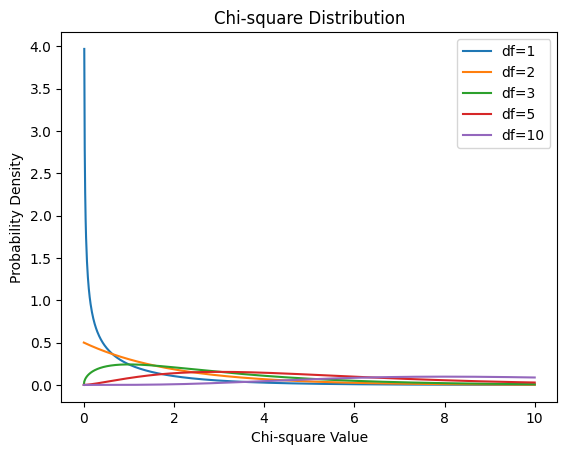

In [18]:
"""
15. Create a Python script to simulate and visualize the Chi-square distribution and discuss its characteristics.
"""
import matplotlib.pyplot as plt

x = np.linspace(0, 10, 1000)
df_values = [1, 2, 3, 5, 10]

for df in df_values:
    plt.plot(x, stats.chi2.pdf(x, df), label=f'df={df}')

plt.xlabel('Chi-square Value')
plt.ylabel('Probability Density')
plt.legend()
plt.title('Chi-square Distribution')
plt.show()


In [19]:
"""
16. Implement an F-test using Python to compare the variances of two random samples.
"""

def f_test(sample1, sample2):
    var1, var2 = np.var(sample1, ddof=1), np.var(sample2, ddof=1)
    f_statistic = var1 / var2
    df1, df2 = len(sample1) - 1, len(sample2) - 1
    p_value = 1 - stats.f.cdf(f_statistic, df1, df2)
    return f_statistic, p_value

# Example
sample1 = np.random.normal(10, 2, 20)
sample2 = np.random.normal(10, 3, 20)
print(f_test(sample1, sample2))


(np.float64(0.7272470049237698), np.float64(0.752899209139574))


In [20]:
"""
17. Write a Python program to perform an ANOVA test to compare means between multiple groups and interpret the results.
"""
from scipy.stats import f_oneway

group1 = [20, 21, 19, 22, 20]
group2 = [25, 27, 26, 23, 24]
group3 = [30, 31, 29, 28, 32]

f_stat, p_value = f_oneway(group1, group2, group3)
print("F-statistic:", f_stat)
print("P-value:", p_value)


F-statistic: 54.88888888888885
P-value: 9.155439730056828e-07


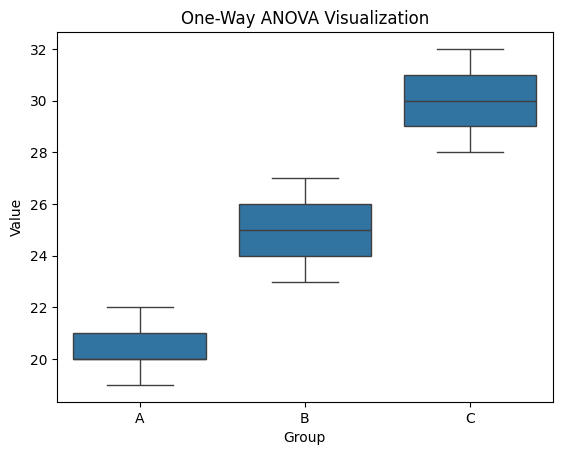

In [21]:
"""
18. Perform a one-way ANOVA test using Python to compare the means of different groups and plot the results.
"""

import seaborn as sns
import pandas as pd

df = pd.DataFrame({
    'Value': group1 + group2 + group3,
    'Group': ['A']*5 + ['B']*5 + ['C']*5
})

sns.boxplot(x='Group', y='Value', data=df)
plt.title("One-Way ANOVA Visualization")
plt.show()


In [22]:
"""
19. Write a Python function to check the assumptions (normality, independence, and equal variance) for ANOVA.
"""

from scipy.stats import shapiro, levene

def check_anova_assumptions(groups):
    for i, group in enumerate(groups):
        stat, p = shapiro(group)
        print(f"Group {i+1} Shapiro-Wilk Test p-value: {p}")
    
    stat, p = levene(*groups)
    print("Levene’s Test for Equal Variance p-value:", p)

check_anova_assumptions([group1, group2, group3])


Group 1 Shapiro-Wilk Test p-value: 0.8139521277236851
Group 2 Shapiro-Wilk Test p-value: 0.9671739349728582
Group 3 Shapiro-Wilk Test p-value: 0.9671739349728582
Levene’s Test for Equal Variance p-value: 0.6911852800129642


In [23]:
"""
20. Perform a two-way ANOVA test using Python to study the interaction between two factors and visualize the results.
"""

import statsmodels.api as sm
from statsmodels.formula.api import ols

df = pd.DataFrame({
    'Value': [20, 21, 19, 22, 20, 25, 27, 26, 23, 24, 30, 31, 29, 28, 32],
    'Factor1': ['A']*5 + ['B']*5 + ['C']*5,
    'Factor2': ['X', 'X', 'Y', 'Y', 'X', 'Y', 'Y', 'X', 'X', 'Y', 'X', 'Y', 'X', 'Y', 'X']
})

model = ols('Value ~ C(Factor1) + C(Factor2) + C(Factor1):C(Factor2)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


                           sum_sq   df          F    PR(>F)
C(Factor1)             230.543254  2.0  44.146581  0.000022
C(Factor2)               0.011111  1.0   0.004255  0.949415
C(Factor1):C(Factor2)    1.688889  2.0   0.323404  0.731754
Residual                23.500000  9.0        NaN       NaN


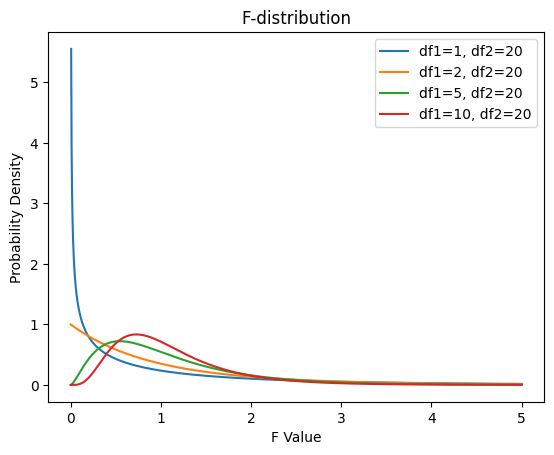

In [24]:
"""
21. Write a Python program to visualize the F-distribution and discuss its use in hypothesis testing.
"""

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

x = np.linspace(0, 5, 1000)
df1_values = [1, 2, 5, 10]
df2 = 20

for df1 in df1_values:
    plt.plot(x, stats.f.pdf(x, df1, df2), label=f'df1={df1}, df2={df2}')

plt.xlabel('F Value')
plt.ylabel('Probability Density')
plt.legend()
plt.title('F-distribution')
plt.show()


F-statistic: 54.88888888888885
P-value: 9.155439730056828e-07


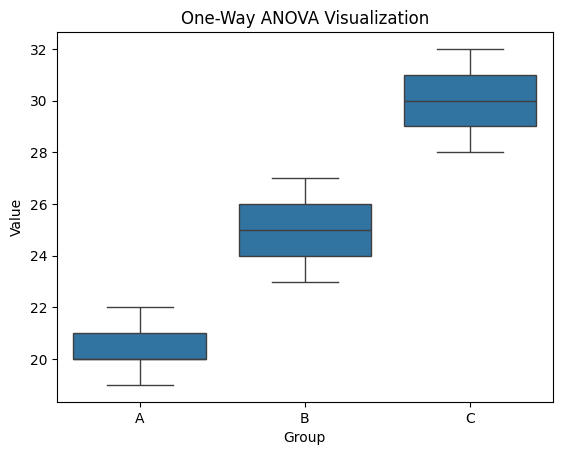

In [25]:
"""
22. Perform a one-way ANOVA test in Python and visualize the results with boxplots to compare group means.
"""

import seaborn as sns
import pandas as pd
from scipy.stats import f_oneway

group1 = [20, 21, 19, 22, 20]
group2 = [25, 27, 26, 23, 24]
group3 = [30, 31, 29, 28, 32]

f_stat, p_value = f_oneway(group1, group2, group3)
print("F-statistic:", f_stat)
print("P-value:", p_value)

df = pd.DataFrame({
    'Value': group1 + group2 + group3,
    'Group': ['A']*5 + ['B']*5 + ['C']*5
})

sns.boxplot(x='Group', y='Value', data=df)
plt.title("One-Way ANOVA Visualization")
plt.show()


In [26]:
"""
23. Simulate random data from a normal distribution, then perform hypothesis testing to evaluate the means.
"""

np.random.seed(42)

sample1 = np.random.normal(50, 10, 30)
sample2 = np.random.normal(52, 10, 30)

t_stat, p_value = stats.ttest_ind(sample1, sample2)
print("T-statistic:", t_stat)
print("P-value:", p_value)


T-statistic: -1.1292363024878542
P-value: 0.26344705521177303


In [27]:
"""
24. Perform a hypothesis test for population variance using a Chi-square distribution and interpret the results.
"""

sample = np.random.normal(100, 15, 30)
sample_variance = np.var(sample, ddof=1)
pop_variance = 15**2
df = len(sample) - 1

chi_square_stat = (df * sample_variance) / pop_variance
p_value = 1 - stats.chi2.cdf(chi_square_stat, df)

print("Chi-Square Statistic:", chi_square_stat)
print("P-value:", p_value)


Chi-Square Statistic: 28.536880265901015
P-value: 0.4893666749241632


In [28]:
"""
25. Write a Python script to perform a Z-test for comparing proportions between two datasets or groups.
"""

from statsmodels.stats.proportion import proportions_ztest

success_a, n_a = 50, 200  # 50 successes out of 200
success_b, n_b = 30, 200  # 30 successes out of 200

z_stat, p_value = proportions_ztest([success_a, success_b], [n_a, n_b])
print("Z-statistic:", z_stat)
print("P-value:", p_value)


Z-statistic: 2.5
P-value: 0.012419330651552265


F-statistic: 0.503966446077055
P-value: 0.9650039176838904


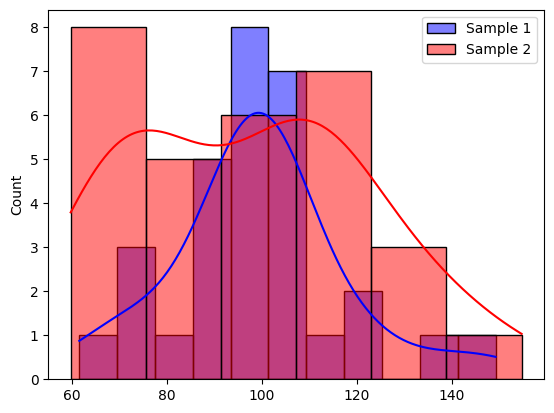

In [29]:
"""
26. Implement an F-test for comparing the variances of two datasets, then interpret and visualize the results.
"""

def f_test(sample1, sample2):
    var1, var2 = np.var(sample1, ddof=1), np.var(sample2, ddof=1)
    f_statistic = var1 / var2
    df1, df2 = len(sample1) - 1, len(sample2) - 1
    p_value = 1 - stats.f.cdf(f_statistic, df1, df2)
    return f_statistic, p_value

sample1 = np.random.normal(100, 20, 30)
sample2 = np.random.normal(100, 25, 30)

f_stat, p_value = f_test(sample1, sample2)
print("F-statistic:", f_stat)
print("P-value:", p_value)

sns.histplot(sample1, kde=True, color="blue", label="Sample 1")
sns.histplot(sample2, kde=True, color="red", label="Sample 2")
plt.legend()
plt.show()


In [30]:
"""
27. Perform a Chi-square test for goodness of fit with simulated data and analyze the results.
"""

observed = np.array([50, 30, 20])
expected = np.array([40, 40, 20])

chi2, p = stats.chisquare(observed, expected)
print("Chi-Square Statistic:", chi2)
print("P-value:", p)


Chi-Square Statistic: 5.0
P-value: 0.0820849986238988
